In [1]:
import pandas as pd

In [2]:
df = {}
for k in ["train", "val", "test"]:
    df[k] = {}
    for c in ["data", "nllf", "lf"]:
        df[k][c] = pd.read_excel(f"setting/{c}_v2_{k}.xlsx", index_col=0)

In [3]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [4]:
X_train = df["train"]["nllf"]
X_val = df["val"]["nllf"]
X_test = df["test"]["nllf"]

y_train = (df["train"]["data"]["Final decision"] == "INCLUDE").apply(int)
y_val = (df["val"]["data"]["Final decision"] == "INCLUDE").apply(int)
y_test = (df["test"]["data"]["Final decision"] == "INCLUDE").apply(int)

In [11]:
new_best_features = ['lf5(Y)',
 'exp26(Y)',
 'b12_v1_v3(N)',
 'b12_v1_v3(Y)',
 'raw10(N)',
 'raw10(Y)',
 'raw61(N)',
 'exp1_v1(Y)',
 'exp1_v3_v1(N)',
 'raw66_v3(N)',
 'raw66_v3(Y)',
 'raw45_v1(N)',
 'b12_v2(Y)',
 'raw38(N)',
 'raw70_v2(N)',
 'raw78(Y)',
 'b8_v2(N)',
 'b8_v2(Y)',
 'raw71(N)',
 'raw71(Y)',
 'raw21(N)',
 'raw21(Y)',
 'raw51(N)',
 'raw51(Y)',
 'exp11(Y)',
 'exp1_v2(Y)',
 'raw21_v3(N)',
 'raw41(N)',
 'raw41(Y)',
 'b7(N)',
 'raw43(N)',
 'lf23(N)',
 'lf23(Y)',
 'raw31_v1(N)',
 'raw31_v1(Y)',
 'raw75(N)',
 'exp12(N)',
 'raw30(N)',
 'exp4_v2(N)',
 'b13_v2(N)',
 'raw70_v3(N)',
 'exp25(N)',
 'exp22_v1(N)',
 'exp27_v1(Y)',
 'raw79(Y)',
 'exp15(Y)',
 'exp2(Y)',
 'raw68(N)',
 'raw68(Y)',
 'lf4(N)',
 'lf7(N)',
 'raw47_v1(N)',
 'raw47_v1(Y)',
 'raw80(Y)',
 'exp13(N)',
 'raw74_v3(Y)',
 'raw62(N)',
 'raw6(N)',
 'raw6(Y)',
 'b6(N)',
 'b6(Y)',
 'raw73_v2(N)',
 'raw73_v2(Y)',
 'b1_v3(N)',
 'b1_v3(Y)',
 'b2_v1(N)',
 'b2_v1(Y)',
 'raw77(N)',
 'raw77(Y)',
 'raw49_v2(N)',
 'raw58(N)',
 'raw58(Y)',
 'raw31_v2(N)',
 'raw57(N)',
 'raw57(Y)',
 'raw25(N)',
 'raw25(Y)',
 'raw26_v1(N)',
 'raw11(Y)',
 'lf15(N)',
 'exp19_v1(Y)',
 'raw69_v2(N)',
 'raw33(Y)',
 'b9(Y)',
 'raw1(Y)',
 'raw70_v1(Y)',
 'lf21(Y)',
 'exp10_v3(N)',
 'exp4(Y)',
 'exp1_v3_v2(Y)',
 'raw27(N)',
 'raw27(Y)',
 'raw36(N)',
 'raw63_v1(N)',
 'exp1_v1_v1(Y)',
 'raw31(N)',
 'raw31(Y)',
 'b5(N)',
 'b5(Y)',
 'exp33(Y)',
 'b1_v1(N)',
 'lf10(N)',
 'b8_v3(N)',
 'b9_v2(N)',
 'b9_v2(Y)',
 'b9_v1(N)',
 'lf1(N)',
 'exp4_v1(N)',
 'exp4_v1(Y)',
 'exp22_v3(Y)',
 'exp12_v1(N)',
 'raw48_v2(Y)',
 'exp30(N)',
 'exp30(Y)',
 'b6_v1_v1(N)',
 'raw7(N)',
 'exp9(N)',
 'exp9(Y)',
 'raw30_v3(N)',
 'raw30_v3(Y)',
 'raw33_v1(Y)',
 'exp1_v1_v3(N)',
 'exp17(Y)',
 'exp33_v2(Y)',
 'lf14(Y)',
 'raw45_v2(Y)',
 'exp5_v3(N)',
 'exp5_v3(Y)',
 'raw63_v2(Y)',
 'raw63_v3(N)',
 'raw48_v3(N)',
 'lf22(Y)',
 'raw67(N)',
 'raw76_v3(N)',
 'raw76_v3(Y)',
 'raw59(N)',
 'raw59(Y)',
 'exp36(N)',
 'exp1_v3(N)',
 'exp1_v3(Y)',
 'exp16(N)',
 'exp16(Y)',
 'raw47(N)',
 'raw45(N)',
 'exp19_v2(N)',
 'raw22(N)',
 'raw74_v2(Y)',
 'exp33_v1(N)',
 'raw64(Y)',
 'exp8(Y)',
 'raw32(N)',
 'raw32(Y)',
 'raw21_v2(N)',
 'raw21_v2(Y)',
 'exp34(N)',
 'raw33_v2(Y)',
 'lf11(Y)',
 'exp22_v2_v3(N)',
 'exp28(Y)',
 'raw4(Y)',
 'b12_v1_v1(Y)',
 'b6_v1_v3(N)',
 'b6_v1_v3(Y)',
 'b8(N)',
 'exp1_v3_v3(N)',
 'exp1_v3_v3(Y)',
 'raw48_v1(N)',
 'raw48_v1(Y)',
 'exp29(N)',
 'raw74(Y)',
 'raw29(Y)',
 'raw12(Y)',
 'exp7(N)',
 'exp7(Y)',
 'raw40(Y)',
 'raw47_v2(N)',
 'b4_v3(Y)',
 'raw50(N)',
 'raw50(Y)',
 'raw76_v1(N)',
 'raw76_v1(Y)',
 'raw66_v1(N)',
 'raw5(Y)',
 'raw35(Y)',
 'raw31_v3(N)',
 'raw30_v2(Y)',
 'exp10_v1(N)',
 'exp5_v1(N)',
 'exp5_v1(Y)',
 'b1(Y)',
 'exp2_v3(N)',
 'exp2_v3(Y)',
 'raw73(Y)',
 'exp2_v2(N)',
 'exp2_v2(Y)',
 'exp12_v3(Y)',
 'raw76(N)',
 'raw76(Y)',
 'raw81(N)',
 'exp22_v2_v1(N)',
 'exp22_v2_v1(Y)',
 'lf3(N)',
 'exp35(N)',
 'exp32(N)',
 'raw47_v3(N)',
 'raw47_v3(Y)',
 'raw69_v1(N)',
 'exp33_v3(N)',
 'raw44(N)',
 'raw44(Y)',
 'raw18(N)',
 'raw18(Y)',
 'raw60(N)',
 'raw60(Y)',
 'raw34(Y)',
 'raw37(N)',
 'raw37(Y)',
 'exp14_v2(N)',
 'b12(Y)',
 'exp27_v2(N)',
 'exp27_v2(Y)',
 'raw9(N)',
 'raw9(Y)',
 'raw24(N)',
 'raw24(Y)',
 'raw33_v3(N)',
 'lf19(N)',
 'lf19(Y)',
 'raw15(N)',
 'raw15(Y)',
 'raw23(N)',
 'exp14_v3(N)',
 'exp14_v3(Y)',
 'raw69_v3(N)',
 'raw73_v1(N)',
 'raw73_v1(Y)',
 'exp19_v3(Y)',
 'raw66(N)',
 'raw66(Y)',
 'raw70(N)',
 'raw70(Y)',
 'raw42(Y)',
 'b2_v3(N)',
 'raw76_v2(N)',
 'exp17_v1(Y)',
 'raw65(Y)',
 'raw66_v2(N)',
 'raw19(N)',
 'raw19(Y)',
 'raw73_v3(N)',
 'exp20(N)',
 'exp20(Y)',
 'exp31(N)',
 'exp31(Y)',
 'raw49(Y)',
 'lf20(N)',
 'lf20(Y)',
 'raw55(N)',
 'exp4_v3(N)',
 'b1_v2(N)',
 'b1_v2(Y)',
 'raw26_v2(Y)',
 'b12_v1(N)',
 'b12_v1(Y)',
 'exp3(Y)',
 'raw20(N)',
 'b4_v2(N)',
 'raw8(N)',
 'raw8(Y)',
 'lf12(N)',
 'raw69(Y)',
 'raw74_v1(Y)',
 'exp27(N)',
 'exp27(Y)',
 'b13_v1(N)',
 'b13_v1(Y)',
 'lf2(N)',
 'b8_v1(N)',
 'b8_v1(Y)',
 'raw46(N)',
 'exp10(N)',
 'raw49_v1(Y)',
 'exp21(N)',
 'exp22_v2_v2(N)',
 'raw49_v3(N)',
 'raw13(N)',
 'raw13(Y)',
 'b13(N)',
 'b13(Y)',
 'raw39(N)',
 'raw39(Y)',
 'exp21_v2(Y)']

In [12]:
clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(X_train[new_best_features], y_train)
print(clf.score(X_train[new_best_features], y_train))
print(classification_report(y_test, clf.predict(X_test[new_best_features]), digits=4))

0.7671428571428571
              precision    recall  f1-score   support

           0     0.7091    0.6223    0.6629       188
           1     0.6979    0.7736    0.7338       212

    accuracy                         0.7025       400
   macro avg     0.7035    0.6980    0.6983       400
weighted avg     0.7031    0.7025    0.7005       400



In [13]:
from matplotlib import pyplot as plt
from sklearn import tree

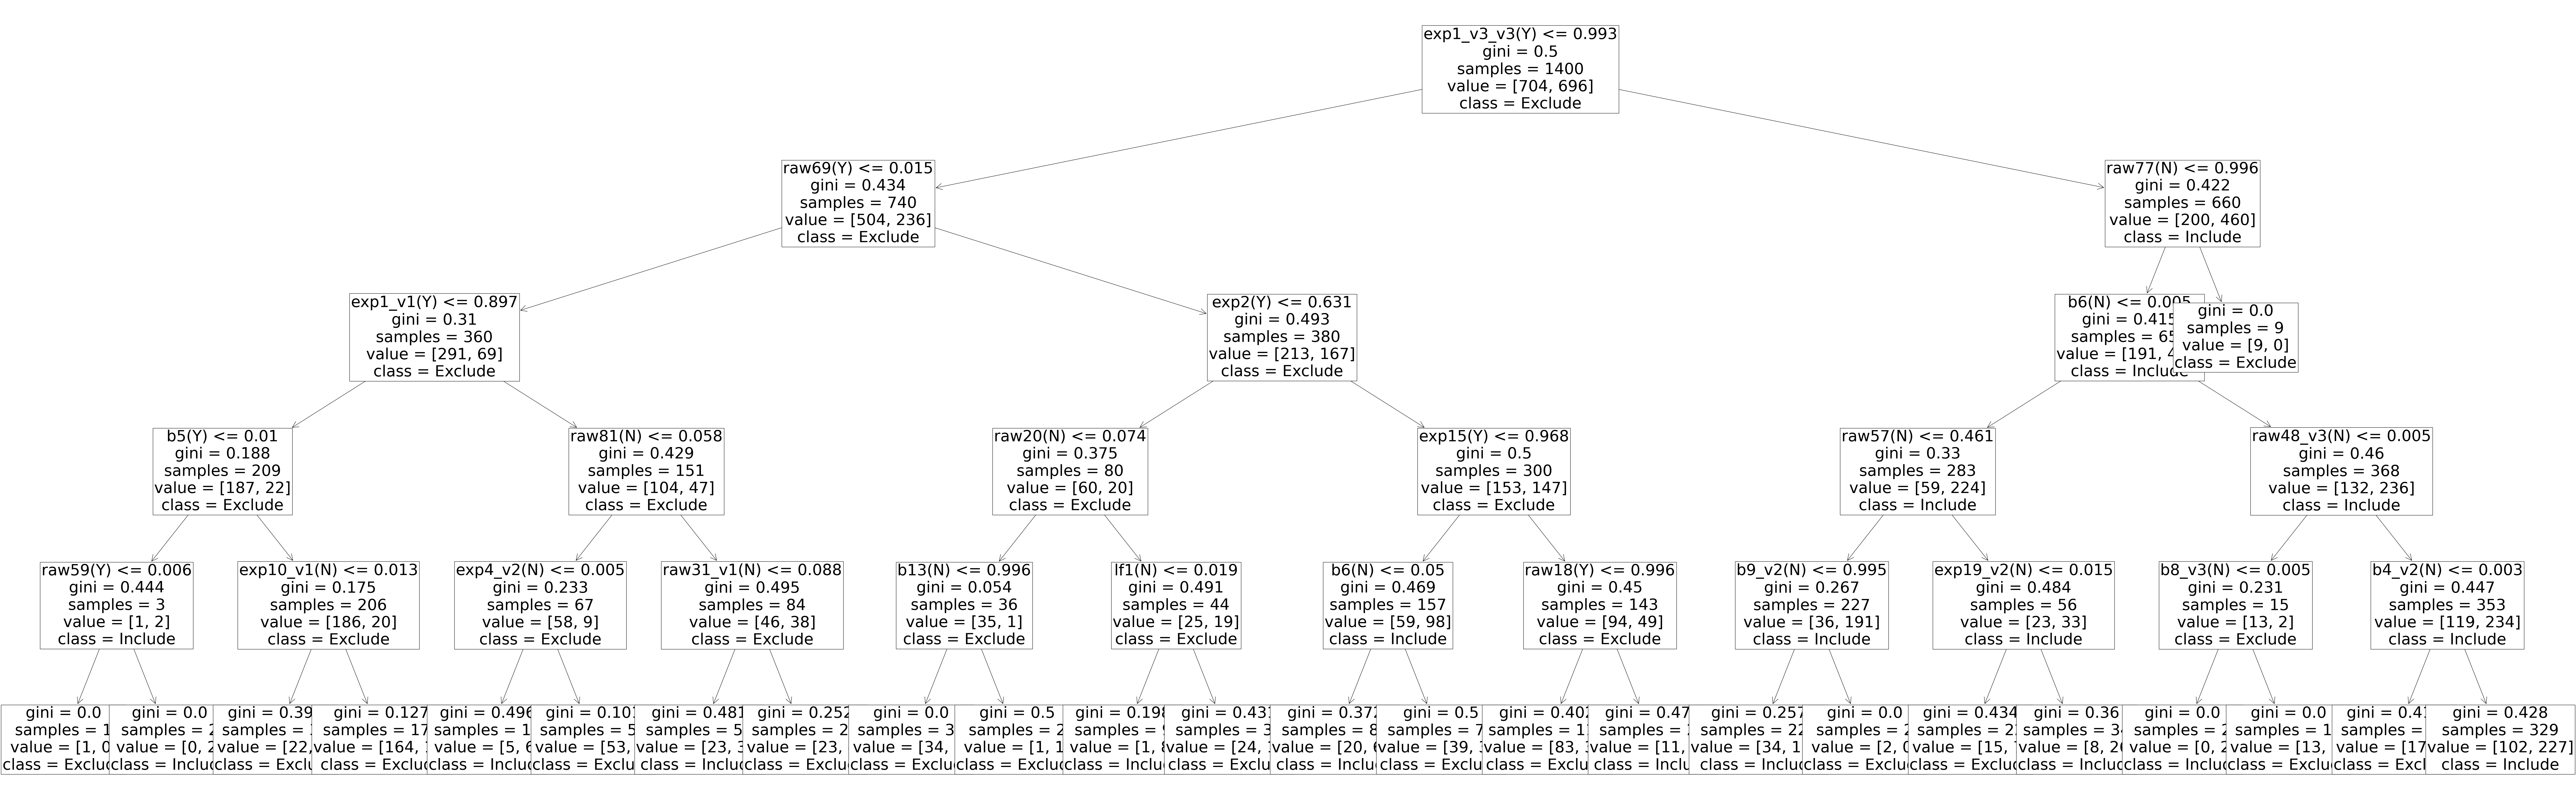

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(265//2, 85//2))
tree.plot_tree(clf, feature_names=new_best_features, ax=ax, fontsize=45, class_names=["Exclude","Include"]);

In [16]:
o = clf.feature_names_in_[[i for i in clf.tree_.feature if i>=0]]
o

array(['exp1_v3_v3(Y)', 'raw69(Y)', 'exp1_v1(Y)', 'b5(Y)', 'raw59(Y)',
       'exp10_v1(N)', 'raw81(N)', 'exp4_v2(N)', 'raw31_v1(N)', 'exp2(Y)',
       'raw20(N)', 'b13(N)', 'lf1(N)', 'exp15(Y)', 'b6(N)', 'raw18(Y)',
       'raw77(N)', 'b6(N)', 'raw57(N)', 'b9_v2(N)', 'exp19_v2(N)',
       'raw48_v3(N)', 'b8_v3(N)', 'b4_v2(N)'], dtype=object)

In [21]:
clf = DecisionTreeClassifier(random_state=42, max_depth=8)
clf.fit(X_train[new_best_features], y_train)
print(clf.score(X_train[new_best_features], y_train))
print(classification_report(y_test, clf.predict(X_test[new_best_features]), digits=4))
set(clf.feature_names_in_[[i for i in clf.tree_.feature if i>=0]])

0.8821428571428571
              precision    recall  f1-score   support

           0     0.6424    0.5638    0.6006       188
           1     0.6511    0.7217    0.6846       212

    accuracy                         0.6475       400
   macro avg     0.6467    0.6428    0.6426       400
weighted avg     0.6470    0.6475    0.6451       400



{'b12_v1(N)',
 'b12_v1_v3(Y)',
 'b13(N)',
 'b13_v1(N)',
 'b1_v2(N)',
 'b2_v1(N)',
 'b2_v1(Y)',
 'b4_v2(N)',
 'b4_v3(Y)',
 'b5(Y)',
 'b6(N)',
 'b7(N)',
 'b8_v1(N)',
 'b8_v2(Y)',
 'b8_v3(N)',
 'b9_v2(N)',
 'b9_v2(Y)',
 'exp10(N)',
 'exp10_v1(N)',
 'exp13(N)',
 'exp15(Y)',
 'exp16(Y)',
 'exp17_v1(Y)',
 'exp19_v2(N)',
 'exp1_v1(Y)',
 'exp1_v2(Y)',
 'exp1_v3_v1(N)',
 'exp1_v3_v3(N)',
 'exp1_v3_v3(Y)',
 'exp2(Y)',
 'exp22_v2_v1(N)',
 'exp28(Y)',
 'exp2_v2(N)',
 'exp2_v2(Y)',
 'exp2_v3(Y)',
 'exp31(N)',
 'exp34(N)',
 'exp4_v1(Y)',
 'exp4_v2(N)',
 'exp7(Y)',
 'lf1(N)',
 'lf10(N)',
 'lf19(Y)',
 'lf21(Y)',
 'lf23(N)',
 'raw13(N)',
 'raw13(Y)',
 'raw18(Y)',
 'raw20(N)',
 'raw25(Y)',
 'raw27(Y)',
 'raw30_v3(N)',
 'raw31(N)',
 'raw31_v1(N)',
 'raw37(Y)',
 'raw47_v3(N)',
 'raw48_v3(N)',
 'raw51(Y)',
 'raw55(N)',
 'raw57(N)',
 'raw59(Y)',
 'raw60(Y)',
 'raw63_v1(N)',
 'raw65(Y)',
 'raw69(Y)',
 'raw69_v1(N)',
 'raw69_v3(N)',
 'raw70(Y)',
 'raw73_v2(Y)',
 'raw74(Y)',
 'raw74_v2(Y)',
 'raw74_v3(Y)',
 'r